In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Cargar el Dataset de Salary_Data

Los datos mostrados muestran la relacion que existe entre el salario que ganan los trabajadores de una empresa, basandose en sus años de experiencia trabajando en la empresa y en su edad.

Variables en orden:
- YearsExperience
- Age
- Salary

In [12]:
import pandas as pd
df = pd.read_csv("Salary_Data.csv", sep=',', header=0, names=["YearsExperience", "Age", "Salary"])
print(df)

    YearsExperience   Age  Salary
0               1.1  21.0   39343
1               1.3  21.5   46205
2               1.5  21.7   37731
3               2.0  22.0   43525
4               2.2  22.2   39891
5               2.9  23.0   56642
6               3.0  23.0   60150
7               3.2  23.3   54445
8               3.2  23.3   64445
9               3.7  23.6   57189
10              3.9  23.9   63218
11              4.0  24.0   55794
12              4.0  24.0   56957
13              4.1  24.0   57081
14              4.5  25.0   61111
15              4.9  25.0   67938
16              5.1  26.0   66029
17              5.3  27.0   83088
18              5.9  28.0   81363
19              6.0  29.0   93940
20              6.8  30.0   91738
21              7.1  30.0   98273
22              7.9  31.0  101302
23              8.2  32.0  113812
24              8.7  33.0  109431
25              9.0  34.0  105582
26              9.5  35.0  116969
27              9.6  36.0  112635
28            

In [31]:
df.iloc[1::2, :3]

,YearsExperience,Age,Salary
1,1.3,21.5,46205
3,2.0,22.0,43525
5,2.9,23.0,56642
7,3.2,23.3,54445
9,3.7,23.6,57189
11,4.0,24.0,55794
13,4.1,24.0,57081
15,4.9,25.0,67938
17,5.3,27.0,83088
19,6.0,29.0,93940


In [35]:
# Separar datos en pares y nones
df_izq = df[0::2]  # Filas pares
df_der = df.iloc[1::2, :3]  # Filas impares, primeras 3 columnas

In [37]:
# Resetear índices y concatenar
df_new = pd.concat([df_izq.reset_index(drop=True), df_der.reset_index(drop=True)], axis=1, ignore_index=True)
df_new

,0,1,2,3,4,5
0,1.1,21.0,39343,1.3,21.5,46205
1,1.5,21.7,37731,2.0,22.0,43525
2,2.2,22.2,39891,2.9,23.0,56642
3,3.0,23.0,60150,3.2,23.3,54445
4,3.2,23.3,64445,3.7,23.6,57189
5,3.9,23.9,63218,4.0,24.0,55794
6,4.0,24.0,56957,4.1,24.0,57081
7,4.5,25.0,61111,4.9,25.0,67938
8,5.1,26.0,66029,5.3,27.0,83088
9,5.9,28.0,81363,6.0,29.0,93940


# Analisis Exploratorio de Datos

Informacion general del Dataset

In [38]:
# Asignar nombres de columnas
df_new.columns = ["YearsExperience_1", "Age_1", "Salary_1", "YearsExperience_2", "Age_2", "Salary_2"]
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsExperience_1  15 non-null     float64
 1   Age_1              15 non-null     float64
 2   Salary_1           15 non-null     int64  
 3   YearsExperience_2  15 non-null     float64
 4   Age_2              15 non-null     float64
 5   Salary_2           15 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 852.0 bytes
None


In [39]:
df_new = df_new.apply(pd.to_numeric)

In [40]:
# Guardar nuevo dataset
df_new.to_csv("datos_salary.csv", index=False, encoding="utf-8")
print(df_new.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsExperience_1  15 non-null     float64
 1   Age_1              15 non-null     float64
 2   Salary_1           15 non-null     int64  
 3   YearsExperience_2  15 non-null     float64
 4   Age_2              15 non-null     float64
 5   Salary_2           15 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 852.0 bytes
None


# Estadisticas Descriptivas

In [43]:
# Análisis exploratorio
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


# Visualización de la distribución de salarios

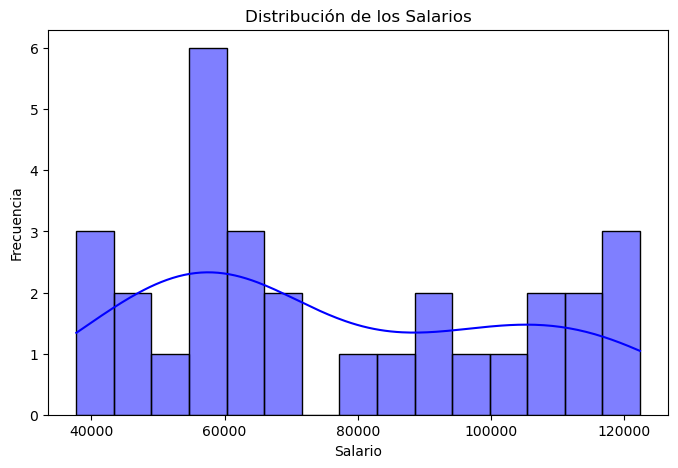

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Salary"], bins=15, kde=True, color="blue")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Salarios")
plt.show()

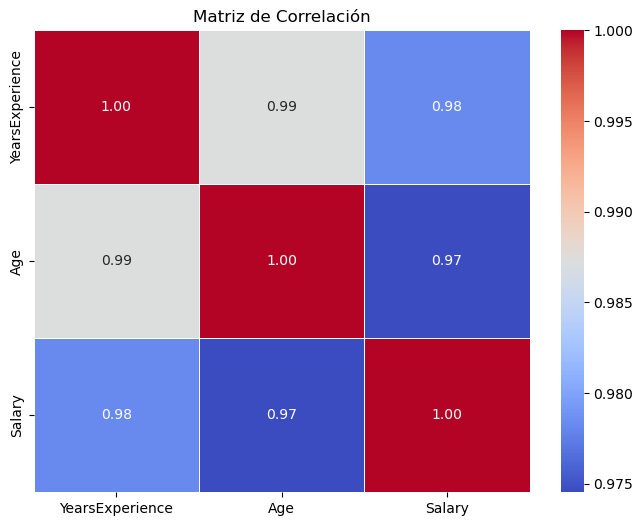

In [45]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


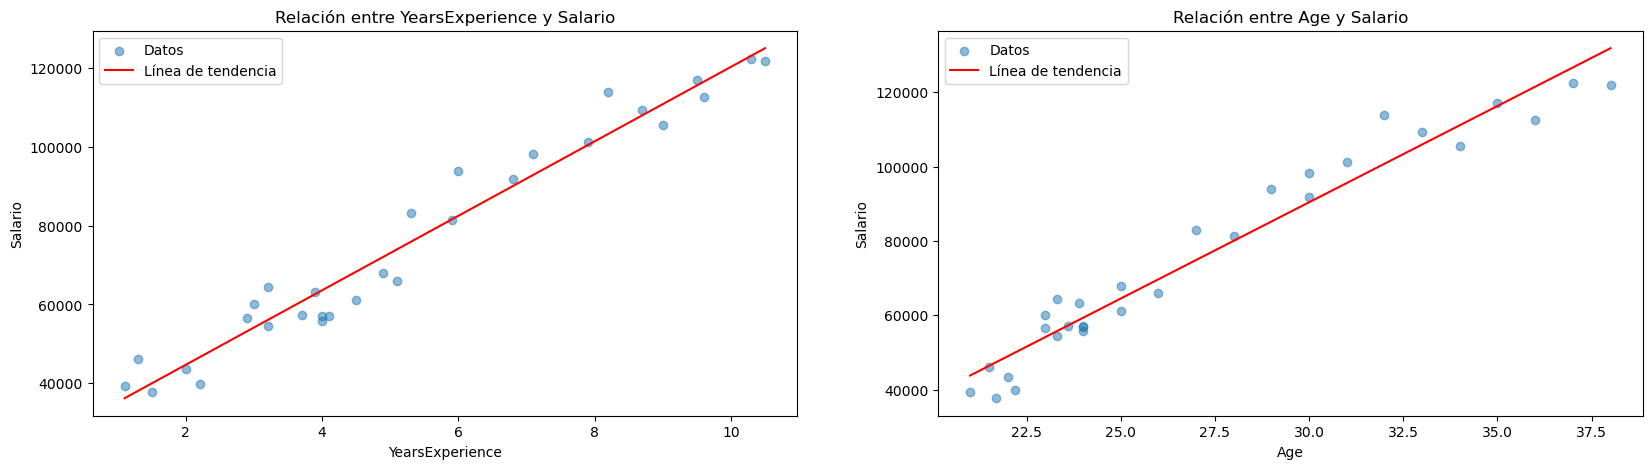

In [50]:
import numpy as np
import matplotlib.pyplot as plt
# Seleccionar las características y la variable objetivo
features = ['YearsExperience', 'Age']
target = df['Salary']
# Crear la figura con dos subgráficos
plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[col]
    y = target
    # Dibujar los puntos de dispersión
    plt.scatter(x, y, marker='o', alpha=0.5, label="Datos")
    # Ajustar y dibujar la línea de tendencia (regresión lineal)
    coef = np.polyfit(x, y, 1)  # Ajuste de una recta (grado 1)
    poly1d_fn = np.poly1d(coef)  # Función de la recta obtenida
    plt.plot(x, poly1d_fn(x), color="red", label="Línea de tendencia")
    plt.title(f'Relación entre {col} y Salario')
    plt.xlabel(col)
    plt.ylabel('Salario')
    plt.legend()
plt.show()


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df_new[["YearsExperience_1", "Age_1", "YearsExperience_2", "Age_2"]]  # Variables predictoras
y = df_new["Salary_1"]  # Variable objetivo (usando Salary_1, puedes cambiar a "Salary_2" si es necesario)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# Realizar predicciones
y_pred = model.predict(X_test)
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Mostrar métricas de evaluación
metrics = pd.DataFrame({
    "Métrica": ["Error Absoluto Medio (MAE)", "Error Cuadrático Medio (MSE)", 
                "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Valor": [mae, mse, rmse, r2]
})
print("Métricas de Evaluación del Modelo")
print(metrics)


Métricas de Evaluación del Modelo
                                  Métrica         Valor
0              Error Absoluto Medio (MAE)  2.774004e+03
1            Error Cuadrático Medio (MSE)  9.353086e+06
2  Raíz del Error Cuadrático Medio (RMSE)  3.058282e+03
3       Coeficiente de Determinación (R²)  9.859754e-01


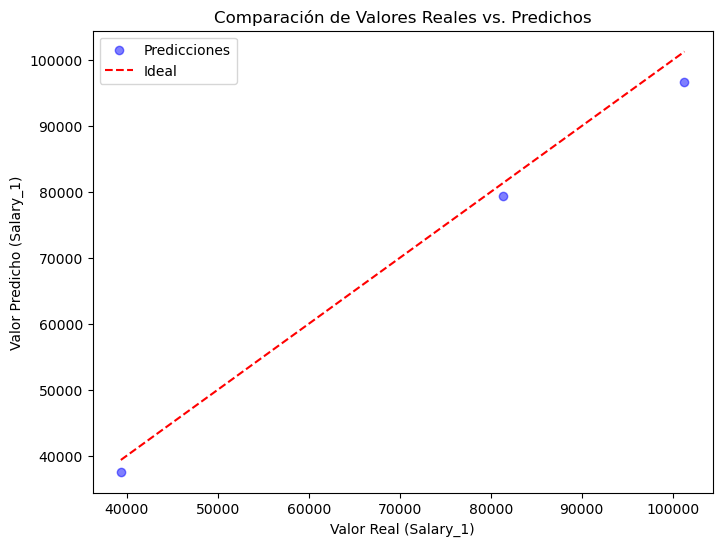

In [52]:
# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")

# Graficar la línea ideal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Ideal")

# Etiquetas y título
plt.xlabel("Valor Real (Salary_1)")
plt.ylabel("Valor Predicho (Salary_1)")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.legend()

# Mostrar la gráfica
plt.show()


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
X = df_new[["YearsExperience_1", "Age_1", "YearsExperience_2", "Age_2"]]  # Variables predictoras
y = df_new["Salary_1"]  # Variable objetivo (usando Salary_1, puedes cambiar a "Salary_2" si es necesario)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_tree_pred)
mse_tree = mean_squared_error(y_test, y_tree_pred)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_tree_pred)
tree_metrics = pd.DataFrame({
    "Métrica": ["Error Absoluto Medio (MAE)", "Error Cuadrático Medio (MSE)", 
                "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Valor": [mae_tree, mse_tree, rmse_tree, r2_tree]
})
print("Métricas del Modelo de Árbol de Decisión:")
print(tree_metrics)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_rf_pred)
rf_metrics = pd.DataFrame({
    "Métrica": ["Error Absoluto Medio (MAE)", "Error Cuadrático Medio (MSE)", 
                "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Valor": [mae_rf, mse_rf, rmse_rf, r2_rf]
})
print("Métricas del Modelo de Random Forest:")
print(rf_metrics)


Métricas del Modelo de Árbol de Decisión:
                                  Métrica         Valor
0              Error Absoluto Medio (MAE)  8.836667e+03
1            Error Cuadrático Medio (MSE)  1.097334e+08
2  Raíz del Error Cuadrático Medio (RMSE)  1.047537e+04
3       Coeficiente de Determinación (R²)  8.354592e-01
Métricas del Modelo de Random Forest:
                                  Métrica         Valor
0              Error Absoluto Medio (MAE)  3.780363e+03
1            Error Cuadrático Medio (MSE)  2.611788e+07
2  Raíz del Error Cuadrático Medio (RMSE)  5.110566e+03
3       Coeficiente de Determinación (R²)  9.608373e-01
